<center>
    <center><h3>Post-Covid Transport Usage - Presentation</h3><br>
<center> The code in this notebook produces two plots from a presentation that I gave, exploring and summarising stories contained within the usage of different modes of transportation since Covid.

<center>
    <center><h4>Cars Against Cyclists</h3><br>

C:\Users\ibarn\AppData\Local\Temp/ipykernel_25256/3029237470.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cycling_and_cars_data['10_day_rolling_avg_value'] = cycling_and_cars_data.groupby('transport_type')['value'].rolling(window=10).mean().reset_index(0, drop=True)


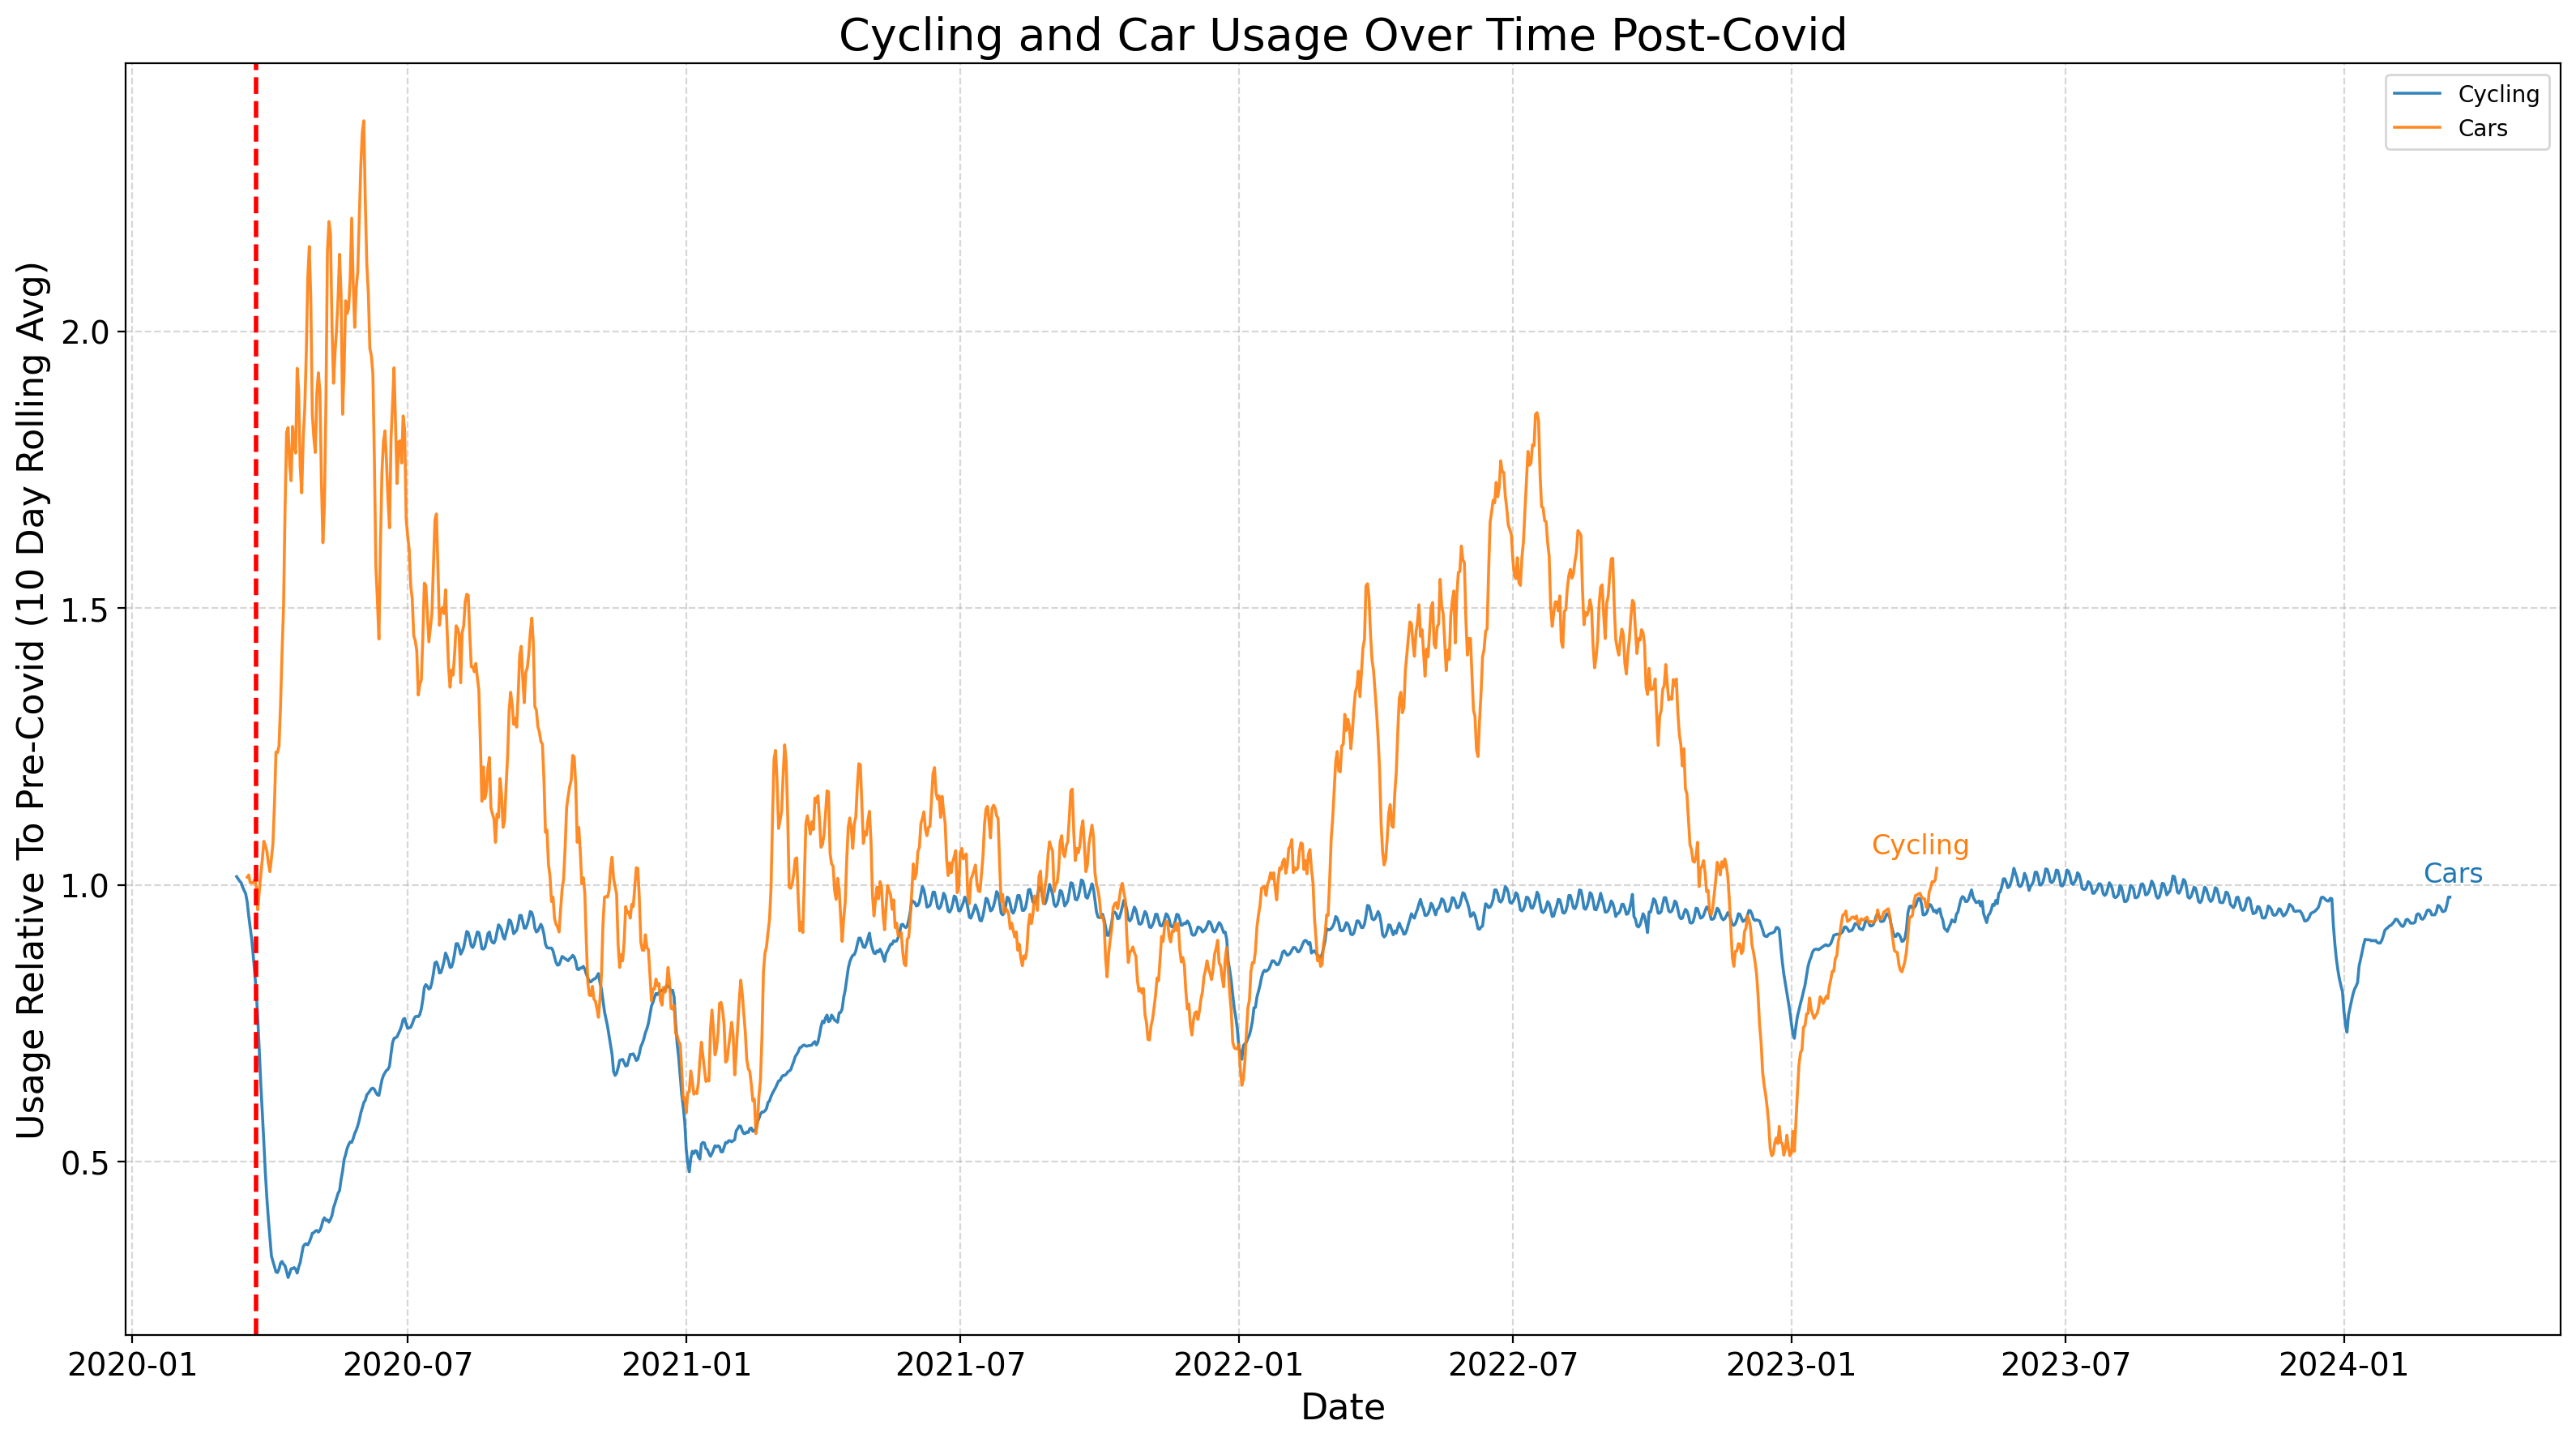

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv(r"C:\Users\ibarn\OneDrive\Desktop\full_data_clean.csv")

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Convert the date column to British format (DD/MM/YYYY) and back to datetime
data['date'] = pd.to_datetime(data['date'].dt.strftime('%d/%m/%Y'))

# Filter for cycling and cars
cycling_and_cars_data = data[data['transport_type'].isin(['cycling', 'cars'])]

# Apply a 10-day rolling average
cycling_and_cars_data['10_day_rolling_avg_value'] = cycling_and_cars_data.groupby('transport_type')['value'].rolling(window=10).mean().reset_index(0, drop=True)

# Create a Seaborn line plot for the dataset
plt.figure(figsize=(16, 9), dpi=200)
sns.lineplot(x='date', y='10_day_rolling_avg_value', data=cycling_and_cars_data, hue='transport_type', estimator=None, linewidth=1.3, alpha=0.9)

# Add a vertical line for UK COVID lockdown announcement
lockdown_announcement_date = pd.to_datetime('2020-03-23')
plt.axvline(lockdown_announcement_date, color='red', linestyle='--', linewidth=2, label='UK COVID Lockdown Announcement')

color_mapping = {
    'cycling': "#ff7f0e",  # Orange for cycling
    'cars': "#1f77b4"      # Blue for cars
}

# Add annotations for each transport type at the end of their lines
for transport_type in cycling_and_cars_data['transport_type'].unique():
    subset = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == transport_type]
    last_date = subset['date'].iloc[-1]
    last_value = subset['10_day_rolling_avg_value'].iloc[-1]

    plt.annotate(transport_type.capitalize(), xy=(last_date, last_value), 
                 xytext=(15, 10), textcoords='offset points', ha='right', va='center', 
                 fontsize=12, color=color_mapping[transport_type])

# Plot settings...
plt.title('Cycling and Car Usage Over Time Post-Covid', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Usage Relative To Pre-Covid (10 Day Rolling Avg)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Update the legend labels
plt.legend(['Cycling', 'Cars'])

plt.tight_layout()

# Display the plot
plt.show()


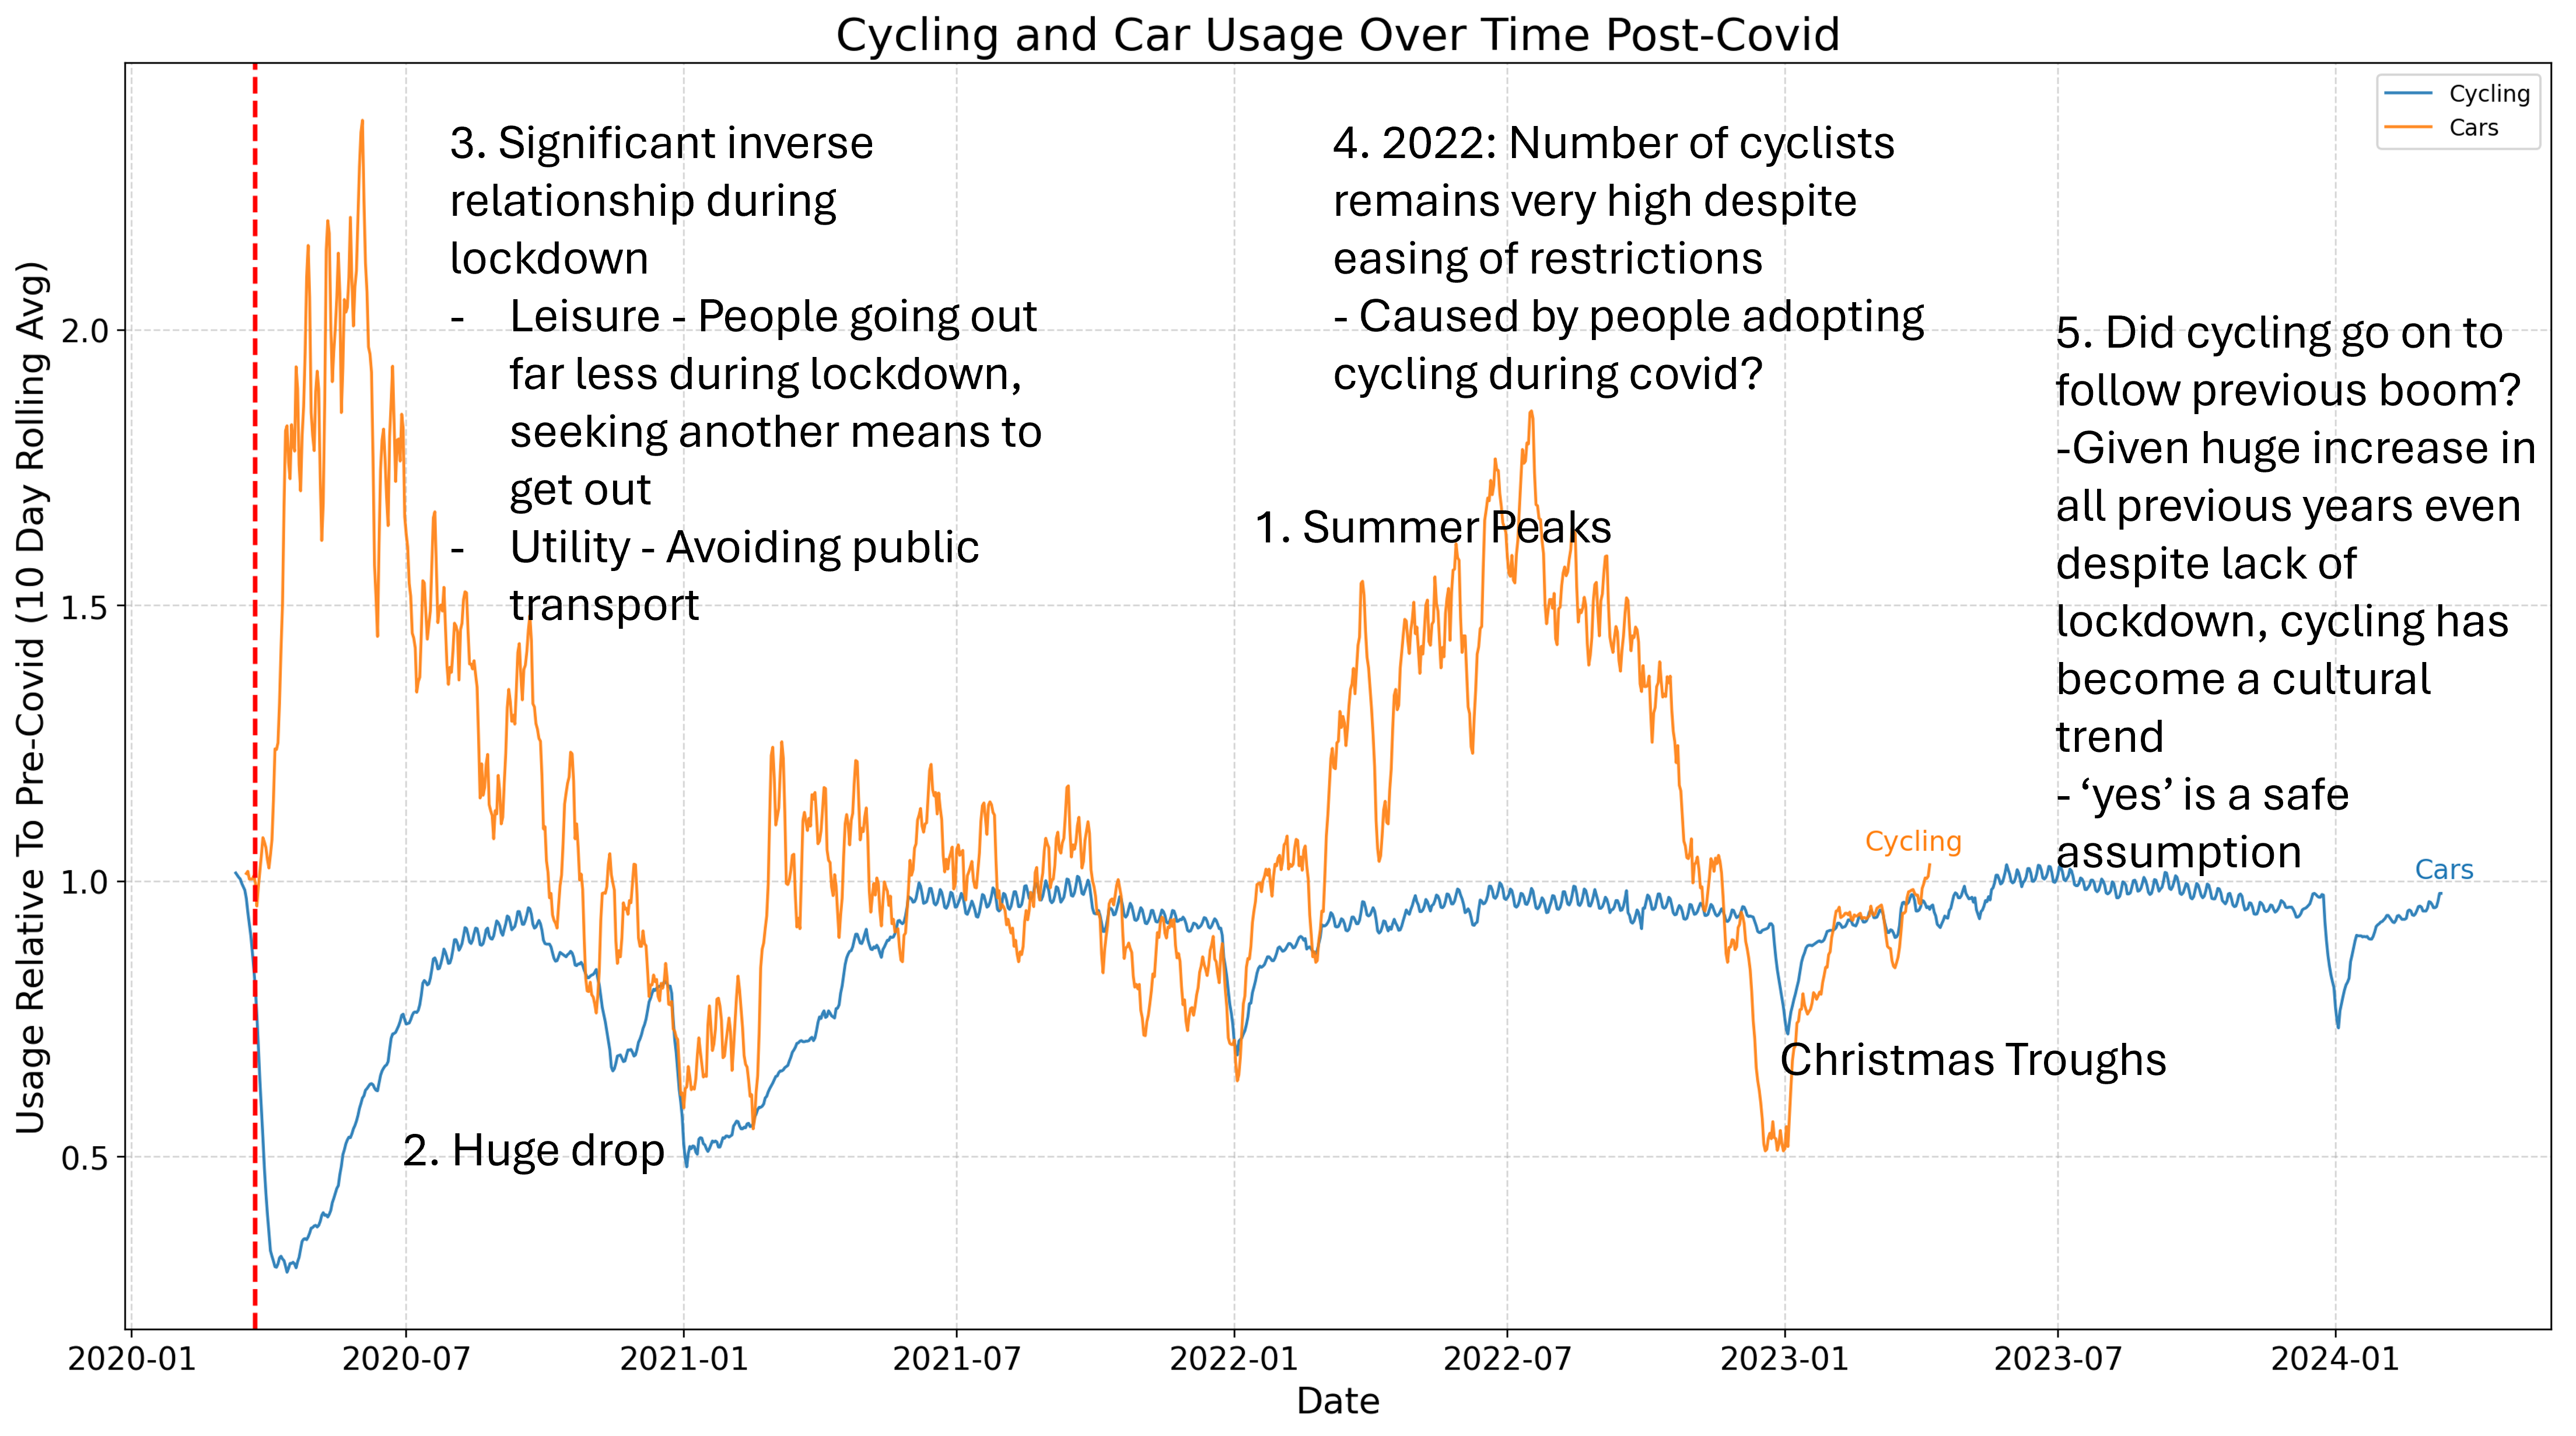

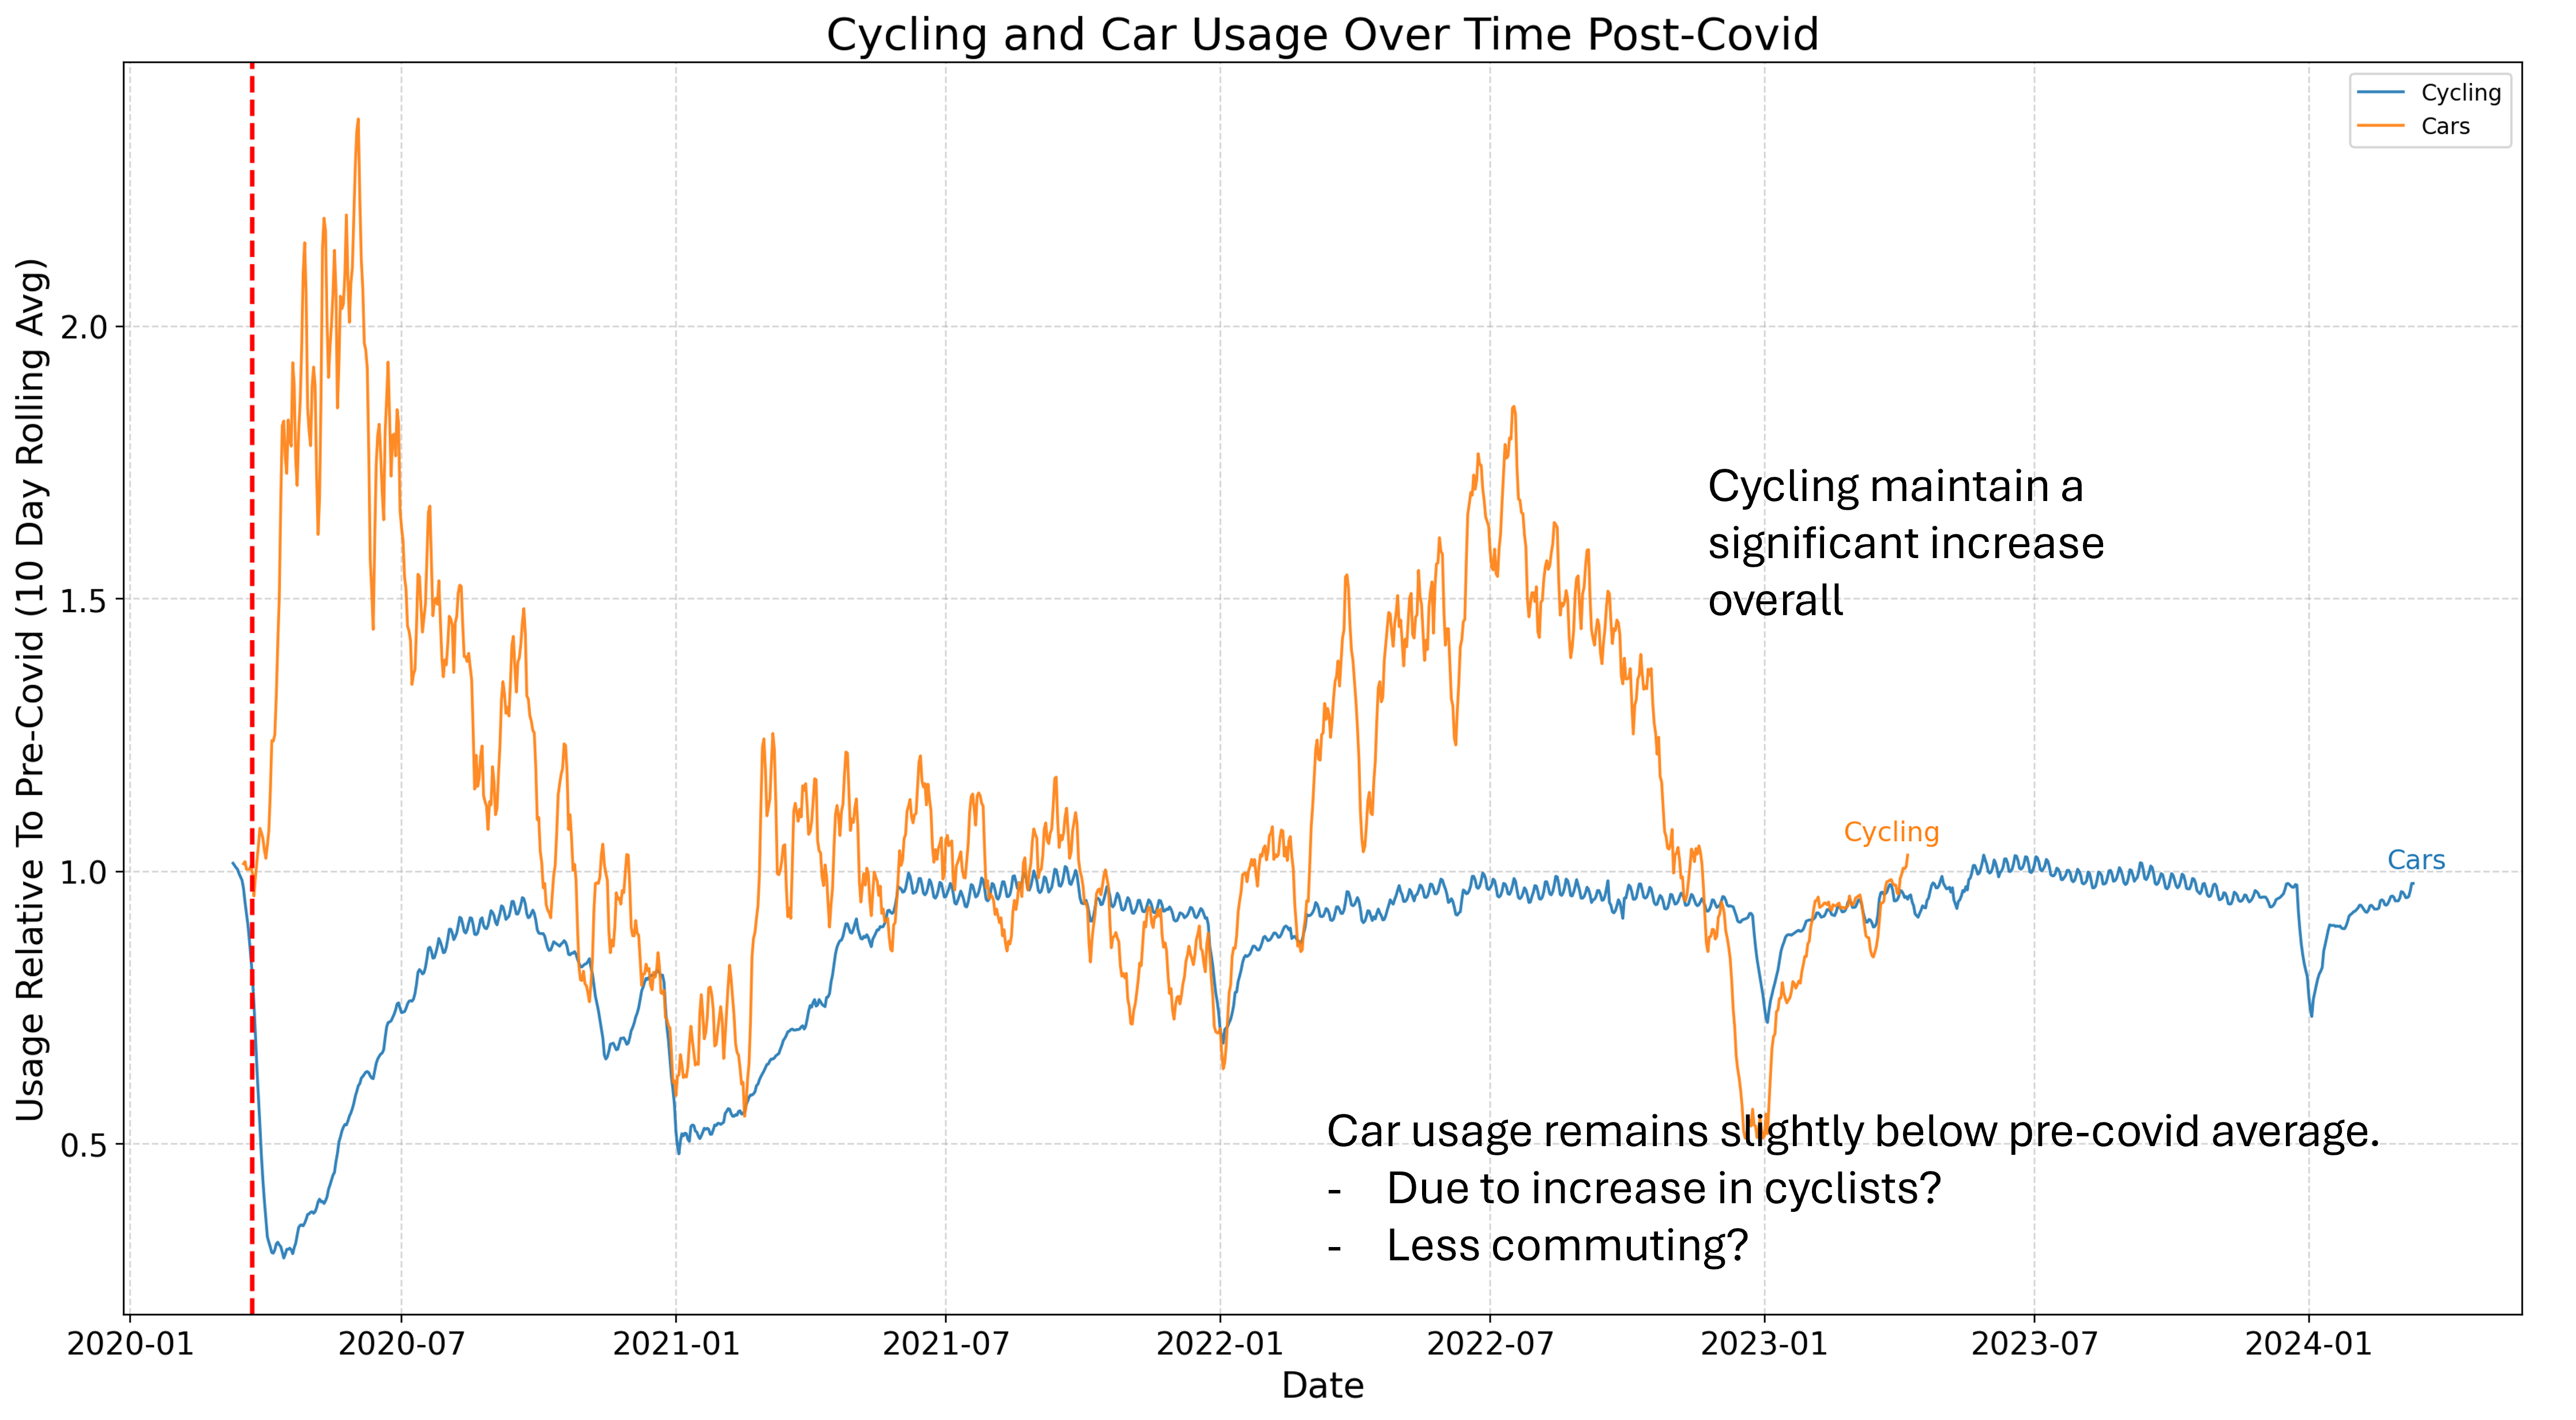

In [2]:
# Calculating summary statistics for 'Cycling'
cycling_mean = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cycling']['10_day_rolling_avg_value'].mean()
cycling_median = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cycling']['10_day_rolling_avg_value'].median()
cycling_max = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cycling']['10_day_rolling_avg_value'].max()
cycling_min = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cycling']['10_day_rolling_avg_value'].min()
cycling_range = cycling_max - cycling_min
cycling_25th = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cycling']['10_day_rolling_avg_value'].quantile(0.25)
cycling_75th = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cycling']['10_day_rolling_avg_value'].quantile(0.75)
cycling_std_dev = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cycling']['10_day_rolling_avg_value'].std()
cycling_cv = cycling_std_dev / cycling_mean

# Calculating summary statistics for 'Cars'
cars_mean = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cars']['10_day_rolling_avg_value'].mean()
cars_median = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cars']['10_day_rolling_avg_value'].median()
cars_max = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cars']['10_day_rolling_avg_value'].max()
cars_min = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cars']['10_day_rolling_avg_value'].min()
cars_range = cars_max - cars_min
cars_25th = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cars']['10_day_rolling_avg_value'].quantile(0.25)
cars_75th = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cars']['10_day_rolling_avg_value'].quantile(0.75)
cars_std_dev = cycling_and_cars_data[cycling_and_cars_data['transport_type'] == 'cars']['10_day_rolling_avg_value'].std()
cars_cv = cars_std_dev / cars_mean

# Extending the summary statistics DataFrame
extended_summary_stats = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Maximum', 'Minimum', 'Range', '25th Percentile', '75th Percentile', 'Standard Deviation', 'Coefficient of Variation'],
    'Cycling': [cycling_mean, cycling_median, cycling_max, cycling_min, cycling_range, cycling_25th, cycling_75th, cycling_std_dev, cycling_cv],
    'Cars': [cars_mean, cars_median, cars_max, cars_min, cars_range, cars_25th, cars_75th, cars_std_dev, cars_cv]
})

print(extended_summary_stats)

                     Metric   Cycling      Cars
0                      Mean  1.144443  0.873168
1                    Median  1.044000  0.933000
2                   Maximum  2.380000  1.030000
3                   Minimum  0.511000  0.291000
4                     Range  1.869000  0.739000
5           25th Percentile  0.910000  0.856000
6           75th Percentile  1.394000  0.964000
7        Standard Deviation  0.347520  0.151983
8  Coefficient of Variation  0.303658  0.174059


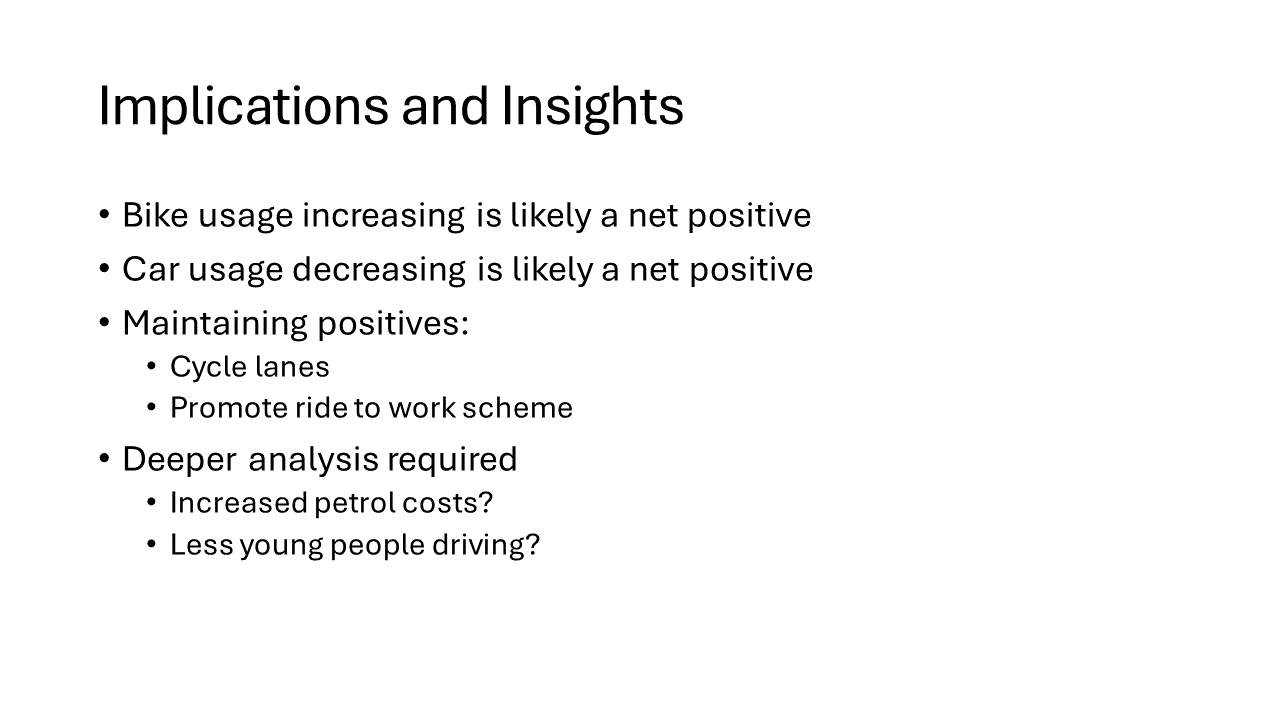

<center>
    <center><h4>Light Commercial Vehicles Against Heavy Goods Vehicles</h3><br>

In [6]:
#Taking data from dataset
data_cars = data[data["transport_type"] == "cars"]
data_lcv = data[data["transport_type"] == "light_commercial_vehicles"]
data_hgv = data[data["transport_type"] == "heavy_goods_vehicles"]
data_amv = data[data["transport_type"] == "all_motor_vehicles"]
data_tfl_tube = data[data["transport_type"] == "tfl_tube"]
data_tfl_bus = data[data["transport_type"] == "tfl_bus"]
data_nr = data[data["transport_type"] == "national_rail"]
#Converting dates to datetime format
data_cars['date'] = pd.to_datetime(data_cars['date'], dayfirst=True)
data_lcv['date'] = pd.to_datetime(data_lcv['date'], dayfirst=True)
data_hgv['date'] = pd.to_datetime(data_hgv['date'], dayfirst=True)
data_amv['date'] = pd.to_datetime(data_amv['date'], dayfirst=True)
data_tfl_tube['date'] = pd.to_datetime(data_tfl_tube['date'], dayfirst=True)
data_tfl_bus['date'] = pd.to_datetime(data_tfl_bus['date'], dayfirst=True)

C:\Users\ibarn\AppData\Local\Temp/ipykernel_25256/3270537391.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cars['date'] = pd.to_datetime(data_cars['date'], dayfirst=True)
C:\Users\ibarn\AppData\Local\Temp/ipykernel_25256/3270537391.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lcv['date'] = pd.to_datetime(data_lcv['date'], dayfirst=True)
C:\Users\ibarn\AppData\Local\Temp/ipykernel_25256/3270537391.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [7]:
#Creating new rolling average columns from data values in dataset
data_cars['cars_rolling_avg'] = data_cars['value'].rolling(window=10).mean()
data_lcv['lcv_rolling_avg'] = data_lcv['value'].rolling(window=10).mean()
data_hgv['hgv_rolling_avg'] = data_hgv['value'].rolling(window=10).mean()
data_amv['amv_rolling_avg'] = data_amv['value'].rolling(window=10).mean()
data_tfl_tube['tfl_tube_rolling_avg'] = data_tfl_tube['value'].rolling(window=10).mean()
data_tfl_bus['tfl_bus_rolling_avg'] = data_tfl_bus['value'].rolling(window=10).mean()
data_nr['nr_rolling_avg'] = data_nr['value'].rolling(window=10).mean()


C:\Users\ibarn\AppData\Local\Temp/ipykernel_25256/3011347170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cars['cars_rolling_avg'] = data_cars['value'].rolling(window=10).mean()
C:\Users\ibarn\AppData\Local\Temp/ipykernel_25256/3011347170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lcv['lcv_rolling_avg'] = data_lcv['value'].rolling(window=10).mean()
C:\Users\ibarn\AppData\Local\Temp/ipykernel_25256/3011347170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

C:\Users\ibarn\AppData\Local\Temp/ipykernel_25256/383210001.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lcv['date'] = pd.to_datetime(data_lcv['date'])
C:\Users\ibarn\AppData\Local\Temp/ipykernel_25256/383210001.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hgv['date'] = pd.to_datetime(data_hgv['date'])
C:\Users\ibarn\AppData\Local\Temp/ipykernel_25256/383210001.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

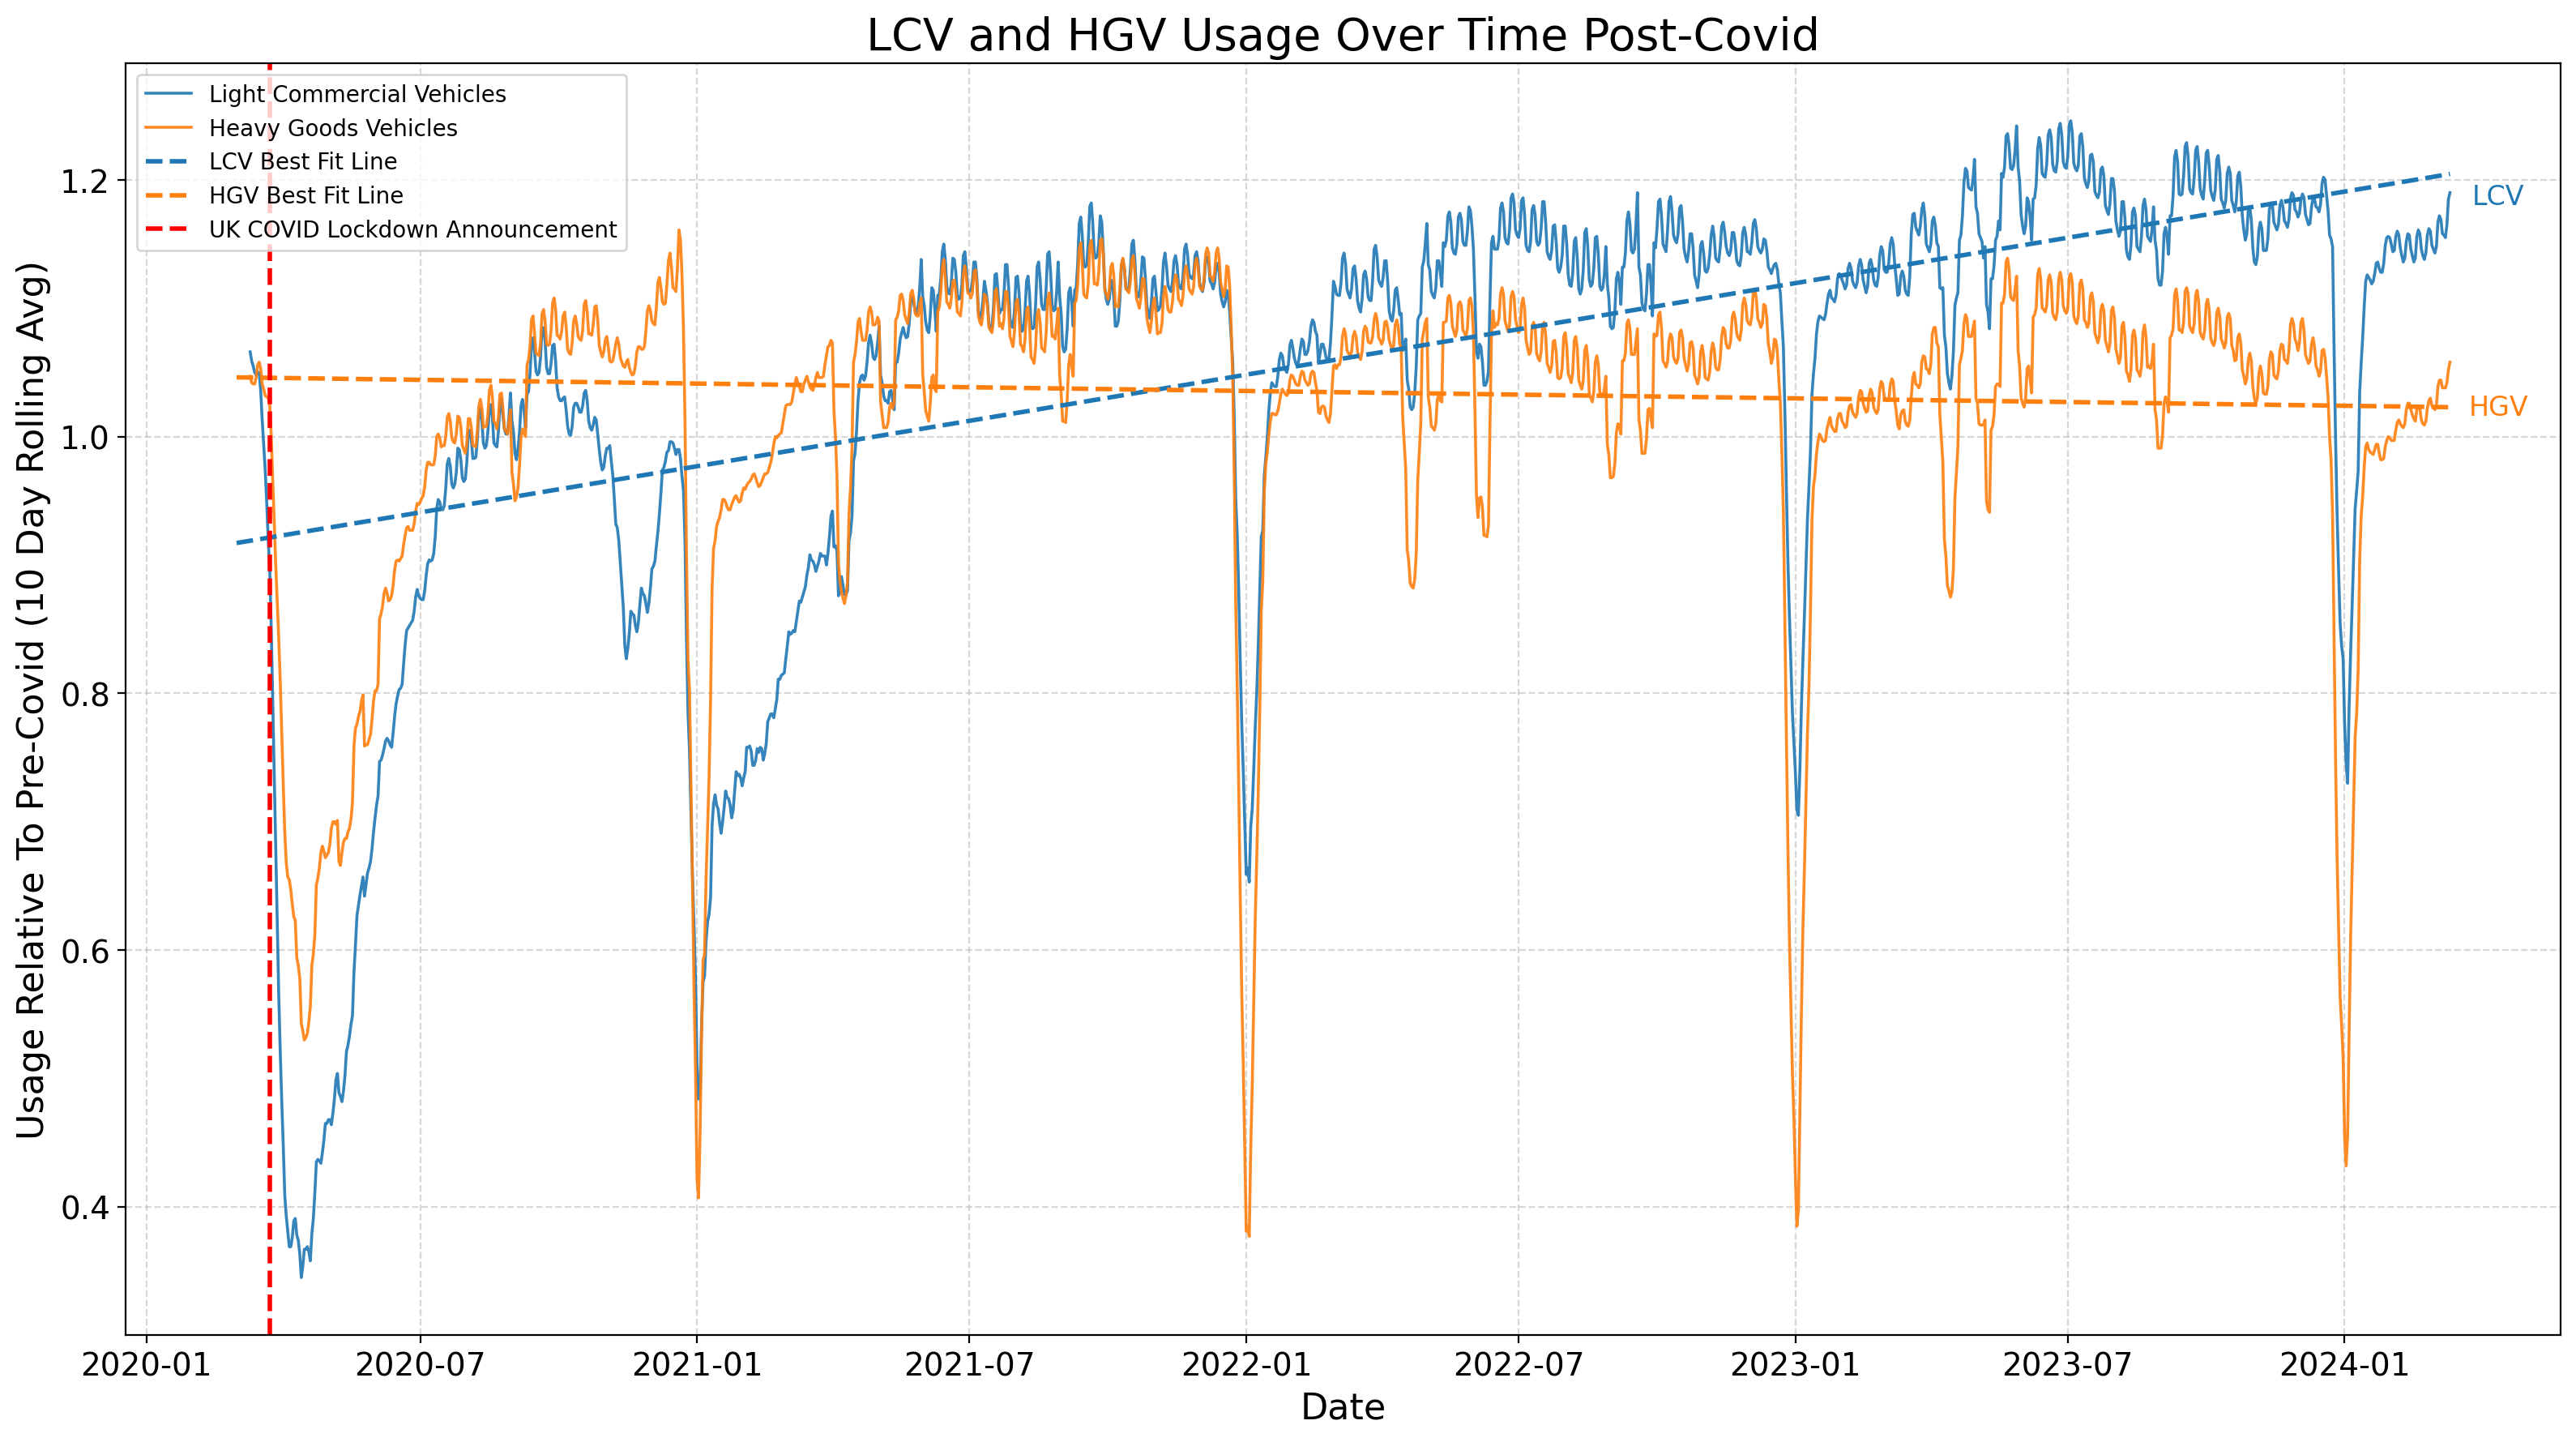

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert 'date' column to numerical format for regression analysis
data_lcv['date'] = pd.to_datetime(data_lcv['date'])
data_hgv['date'] = pd.to_datetime(data_hgv['date'])
data_lcv['date_num'] = data_lcv['date'].apply(lambda date: date.toordinal())
data_hgv['date_num'] = data_hgv['date'].apply(lambda date: date.toordinal())

# Filter data from September 2020 to March 2024 for the line of best fit calculation
start_date = pd.to_datetime('2020-09-01')
end_date = pd.to_datetime('2024-03-31')
filtered_lcv = data_lcv[(data_lcv['date'] >= start_date) & (data_lcv['date'] <= end_date)]
filtered_hgv = data_hgv[(data_hgv['date'] >= start_date) & (data_hgv['date'] <= end_date)]

# Calculate the line of best fit for the filtered data
lcv_slope, lcv_intercept = np.polyfit(filtered_lcv['date_num'], filtered_lcv['lcv_rolling_avg'], 1)
hgv_slope, hgv_intercept = np.polyfit(filtered_hgv['date_num'], filtered_hgv['hgv_rolling_avg'], 1)

# Generate y-values for the lines of best fit across the whole date range
lcv_best_fit_y = lcv_slope * data_lcv['date_num'] + lcv_intercept
hgv_best_fit_y = hgv_slope * data_hgv['date_num'] + hgv_intercept

# Create a Seaborn line plot for the full dataset
plt.figure(figsize=(16, 9), dpi=200)

# Plot shifted rolling averages for different vehicle types
sns.lineplot(x='date', y='lcv_rolling_avg', data=data_lcv, estimator=None, label='Light Commercial Vehicles', color="#1f77b4", linewidth=1.3, alpha=0.9)
sns.lineplot(x='date', y='hgv_rolling_avg', data=data_hgv, estimator=None, label='Heavy Goods Vehicles', color="#ff7f0e", linewidth=1.3, alpha=0.9)

# Plot lines of best fit
plt.plot(data_lcv['date'], lcv_best_fit_y, color="#1f77b4", linewidth=2, linestyle='--', label='LCV Best Fit Line')
plt.plot(data_hgv['date'], hgv_best_fit_y, color="#ff7f0e", linewidth=2, linestyle='--', label='HGV Best Fit Line')

# Add a vertical line for UK COVID lockdown announcement
lockdown_announcement_date = pd.to_datetime('2020-03-23')
plt.axvline(lockdown_announcement_date, color='red', linestyle='--', linewidth=2, label='UK COVID Lockdown Announcement')

# Add annotations for each line
plt.annotate('LCV', xy=(data_lcv['date'].iloc[-1], lcv_best_fit_y.iloc[-1]), 
             xytext=(33, -10), textcoords='offset points', ha='right', va='center', 
             fontsize=12, color="#1f77b4")

plt.annotate('HGV', xy=(data_hgv['date'].iloc[-1], hgv_best_fit_y.iloc[-1]), 
             xytext=(35, 0), textcoords='offset points', ha='right', va='center', 
             fontsize=12, color="#ff7f0e")

# Plot settings...
plt.title('LCV and HGV Usage Over Time Post-Covid', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Usage Relative To Pre-Covid (10 Day Rolling Avg)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

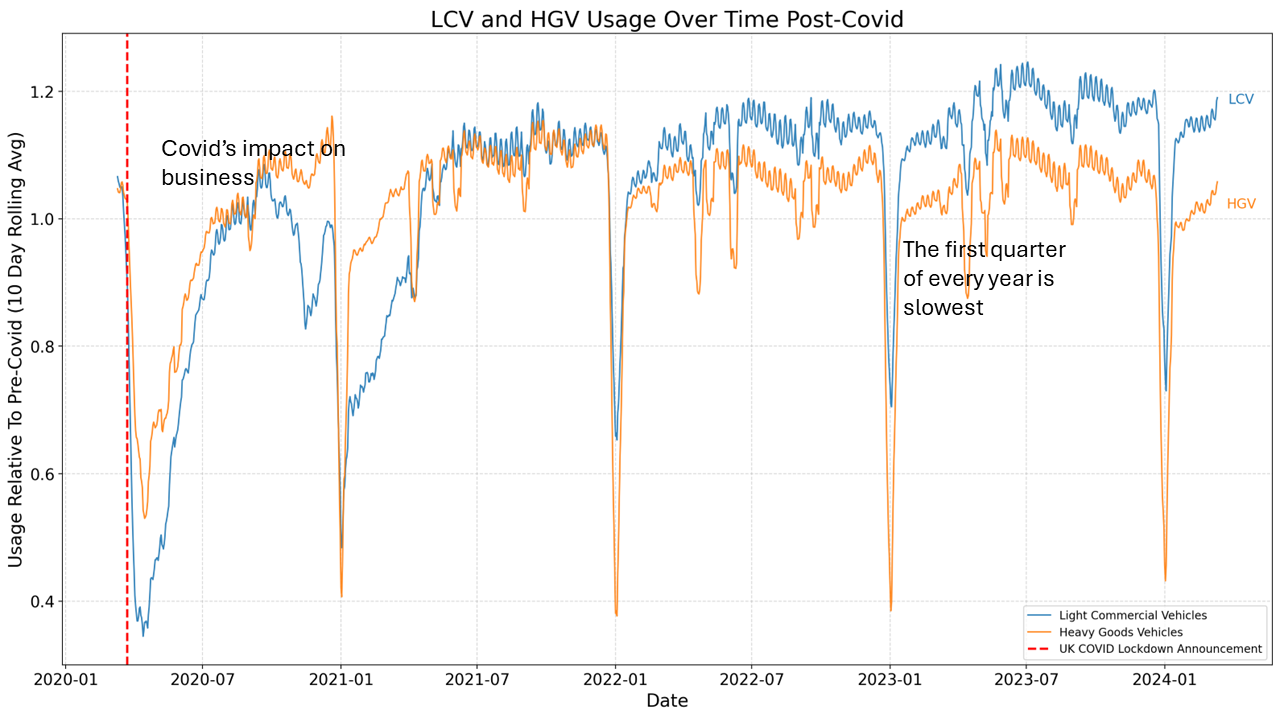

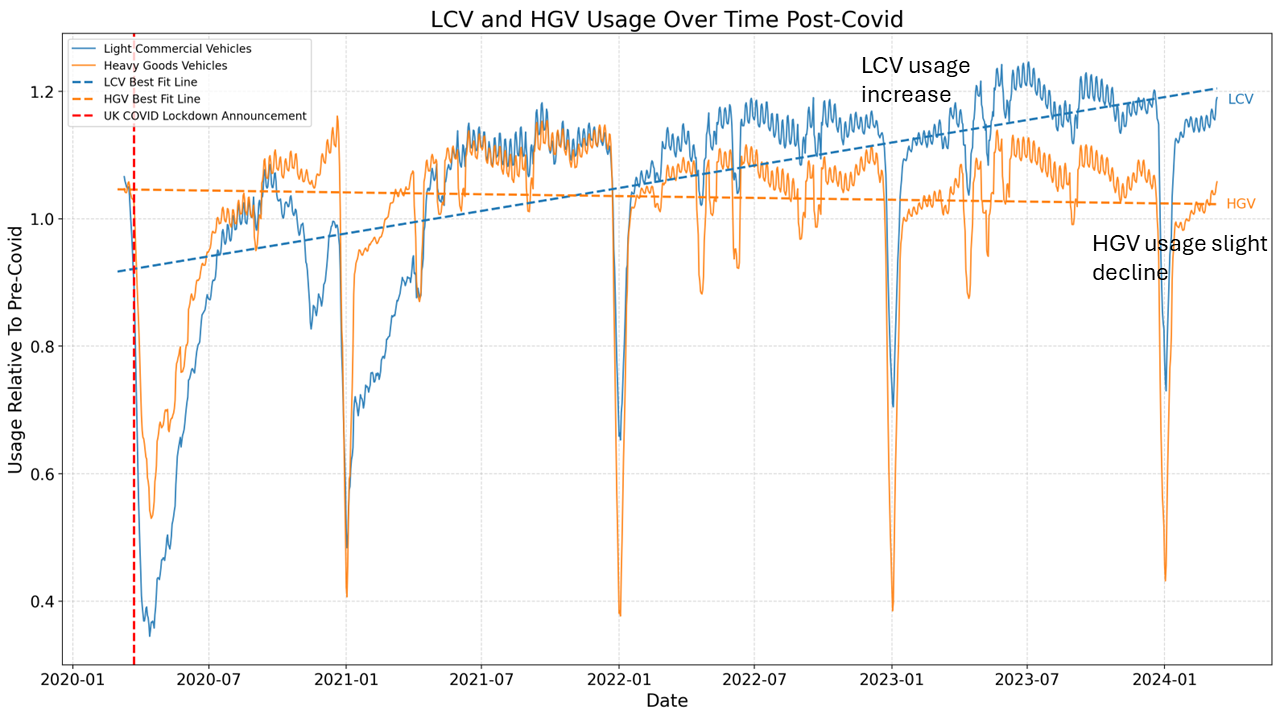

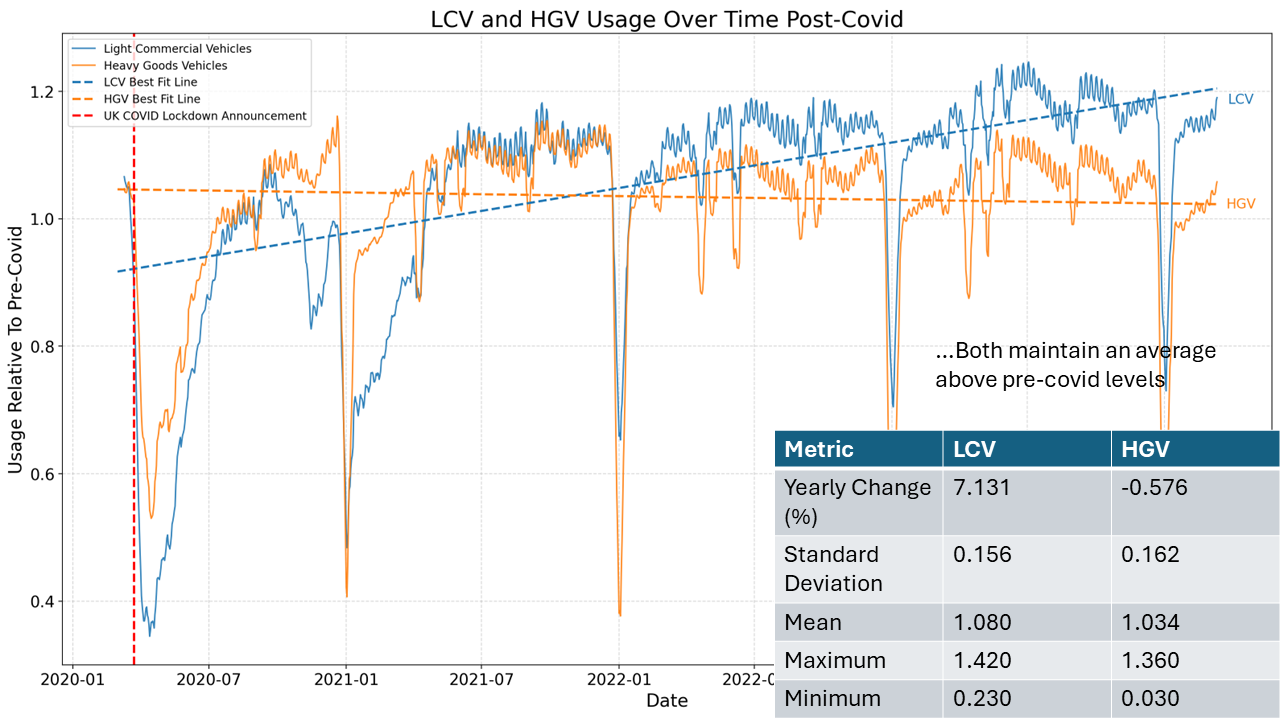

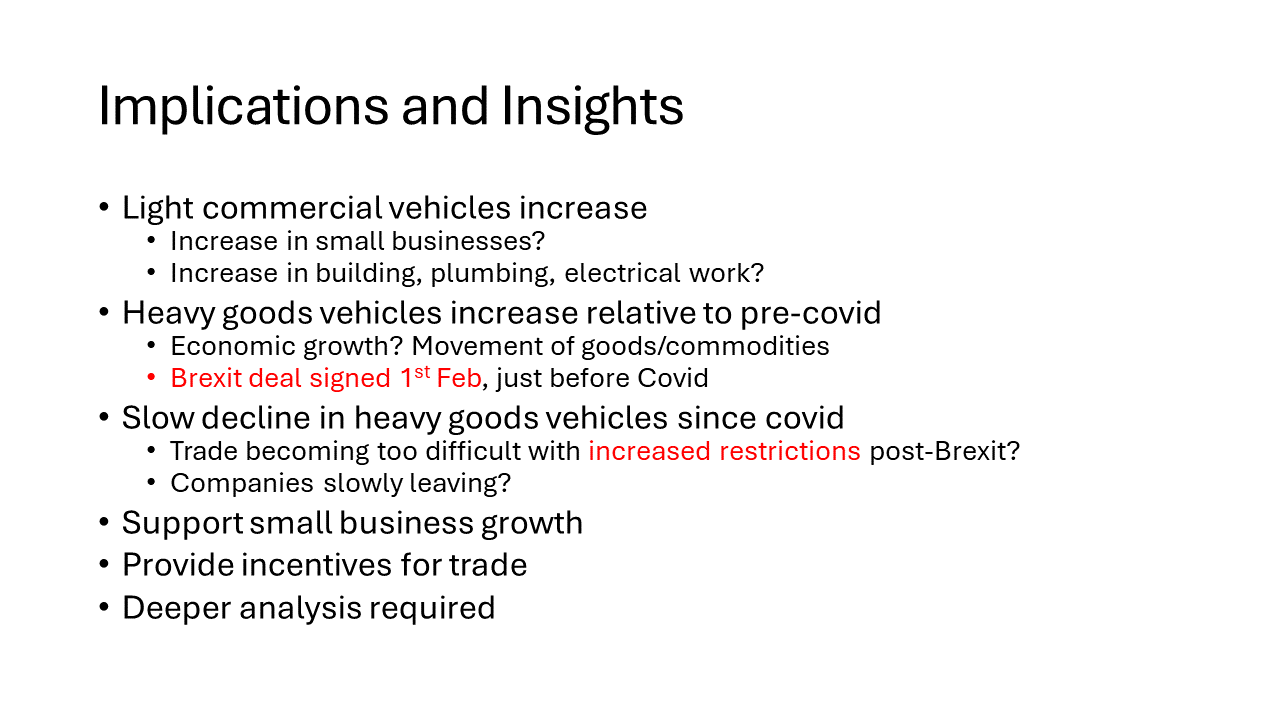